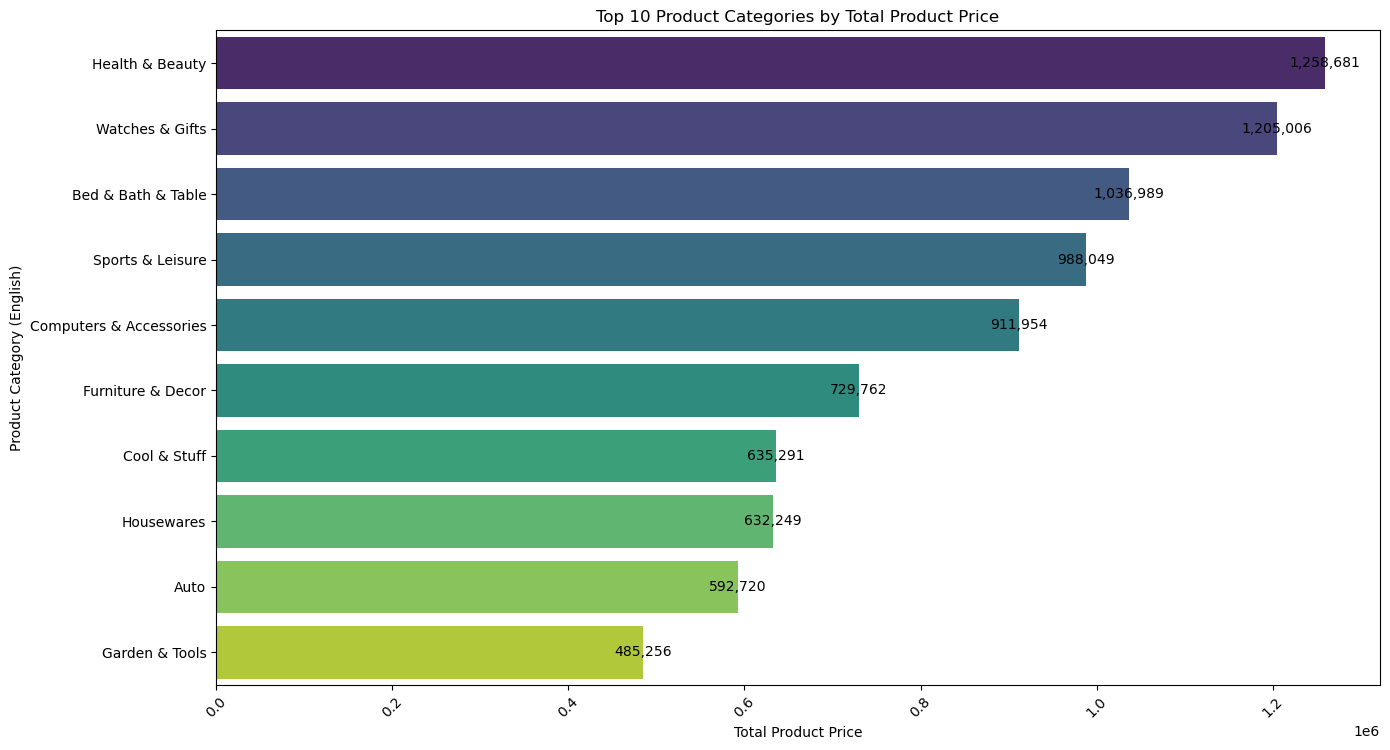

Top 10 Product Categories by Total Product Price:
44. Category Name: Health & Beauty
   Total Product Price: 1,258,681

71. Category Name: Watches & Gifts
   Total Product Price: 1,205,006

8. Category Name: Bed & Bath & Table
   Total Product Price: 1,036,989

66. Category Name: Sports & Leisure
   Total Product Price: 988,049

16. Category Name: Computers & Accessories
   Total Product Price: 911,954

40. Category Name: Furniture & Decor
   Total Product Price: 729,762

21. Category Name: Cool & Stuff
   Total Product Price: 635,291

50. Category Name: Housewares
   Total Product Price: 632,249

6. Category Name: Auto
   Total Product Price: 592,720

43. Category Name: Garden & Tools
   Total Product Price: 485,256



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV files
order_items_data = pd.read_csv('olist_order_items_dataset.csv')
products_data = pd.read_csv('olist_products_dataset.csv')
category_translation_data = pd.read_csv('product_category_name_translation.csv')

# Merge necessary data from various tables
merged_data = pd.merge(order_items_data, products_data, on='product_id')
merged_data = pd.merge(merged_data, category_translation_data, on='product_category_name')

# Convert product category names to Title Case and separate words with spaces
merged_data['product_category_name_english'] = merged_data['product_category_name_english'].str.replace('_', ' & ').str.title()

# Calculate total transaction amount per product category
category_transaction_totals = merged_data.groupby('product_category_name_english')['price'].sum().reset_index()

# Sort product categories based on total transaction amount in descending order
category_transaction_totals = category_transaction_totals.sort_values(by='price', ascending=False)

# Take the top 10 categories
top_10_categories = category_transaction_totals.head(10)

# Visualize the data
plt.figure(figsize=(14, 8))  # Set the figure size to be larger
ax = sns.barplot(x='price', y='product_category_name_english', data=top_10_categories, palette='viridis')
plt.xlabel('Total Product Price')
plt.ylabel('Product Category (English)')
plt.title('Top 10 Product Categories by Total Product Price')
plt.xticks(rotation=45)

# Add numeric labels on each bar with formatted numbers
for p in ax.patches:
    width = p.get_width()
    formatted_width = '{:,.0f}'.format(width)  # Format the number with a comma as a thousands separator
    plt.annotate(formatted_width, (width, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add margin around the plot
plt.show()

# Print ranking information with formatted numbers
print("Top 10 Product Categories by Total Product Price:")
for index, row in top_10_categories.iterrows():
    formatted_total = '{:,.0f}'.format(row['price'])  # Format the number with a comma as a thousands separator
    print(f"{index + 1}. Category Name: {row['product_category_name_english']}")
    print(f"   Total Product Price: {formatted_total}")
    print()